## Car Features and MSRP

### Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lakshmeesh s reddy\Desktop\Dinku\JOB\ML-project\data car.csv")

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#### Normalizing the names of the columns

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Normalizing all the non-numeric data

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### from df.info we got to know that there are 16 col and 11914 rows, so to get the overview of each columnsfollowing code is executed 

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Understanding the present price structure

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<module 'seaborn' from 'C:\\Users\\Lakshmeesh s reddy\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

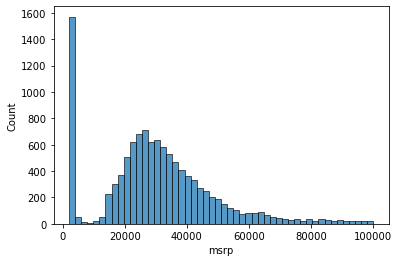

In [8]:
sns.histplot(df.msrp[df.msrp<100000], bins = 50)

sns

#### As the price values are huge we will use the log values 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

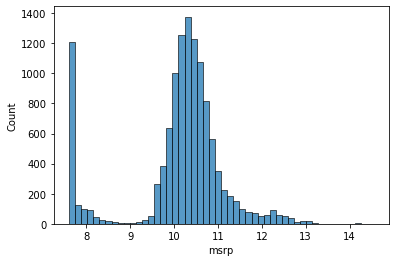

In [9]:
price_log = np.log(df.msrp)
sns.histplot(price_log,bins = 50)


#### Split data

In [10]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

#### Suffle data

In [12]:
idx = np. arange(n)

In [13]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [14]:
np.random.seed(2)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


#### preparing target variable

In [19]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [20]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

#### Linear Regression

In [21]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [23]:
xi = [453,11,86]

#### Here the value of weights are randomly selected. to get the proper weights we have to  perform vector agebra operations

In [24]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [25]:
linear_regression(xi)

12.312

In [26]:
np.expm1(12.312)

222347.2221101062

#### Linear Regression vector form

In [27]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] *xi[j]
        
    return res

In [28]:
dot(xi,w)

5.142

In [29]:
w_new = [w0] + w

In [30]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [31]:
def linear_regression(xi):
    xi = [1] + xi
    print (xi)
    print(w_new)
    return dot(xi,w_new)

In [32]:
linear_regression(xi)

[1, 453, 11, 86]
[7.17, 0.01, 0.04, 0.002]


12.312

In [33]:
xi = [453,11,86] 
w0 = 7.17
w = [0.01,0.04,0.002]

In [34]:
x1 =  [1,148,24,1385]
x2 =  [1,132,29,2031]
x10 = [1,453,11,86]

x = [x1,x2,x10]
x = np.array(x)
x

array([[   1,  148,   24, 1385],
       [   1,  132,   29, 2031],
       [   1,  453,   11,   86]])

In [35]:
x.dot(w_new)

array([12.38 , 13.712, 12.312])

In [36]:
dot(x,w_new)

array([7.2200e+00, 1.0806e+03, 1.7281e+02, 9.9542e+03])

In [37]:
def linear_regression(x):
    return x.dot(w_new)

#### Random array to check the code

In [38]:
X =[ [148,24,1385],
     [132,25,2031],
     [43,91,8698],
     [113,32,9385],
     [192,7955,1031],
     [183,21,81],
     [173,421,2785],
     [242,5,3931],
     [683,51,91],
   ]

#### Train Linear Regression

In [39]:
X = np.array(X)

In [40]:
ones = np.ones(X.shape[0])

In [41]:
X = np.column_stack([ones,X])

In [42]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.300e+01, 9.100e+01, 8.698e+03],
       [1.000e+00, 1.130e+02, 3.200e+01, 9.385e+03],
       [1.000e+00, 1.920e+02, 7.955e+03, 1.031e+03],
       [1.000e+00, 1.830e+02, 2.100e+01, 8.100e+01],
       [1.000e+00, 1.730e+02, 4.210e+02, 2.785e+03],
       [1.000e+00, 2.420e+02, 5.000e+00, 3.931e+03],
       [1.000e+00, 6.830e+02, 5.100e+01, 9.100e+01]])

#### Dummy Y values to check the code

In [43]:
y = [100,200,150,250,320,657,267, 198,245]

In [44]:
XTX = X.T.dot(X)

In [45]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 7.85322627e-01, -1.62757067e-03, -4.99602759e-05,
        -8.60005389e-05],
       [-1.62757067e-03,  5.10278285e-06,  6.34627515e-08,
         1.48193533e-07],
       [-4.99602759e-05,  6.34627515e-08,  2.00061943e-08,
         5.30079082e-09],
       [-8.60005389e-05,  1.48193533e-07,  5.30079082e-09,
         1.51398489e-08]])

In [46]:
w_full = XTX_inv.dot(X.T).dot(y)

In [47]:
def train_linear_regression(X,y):
    X = np.array(X)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [48]:
train_linear_regression(X,y)

(-1.9753440264063396e+18,
 array([ 1.97534403e+18,  4.79792036e-01, -2.34658319e-19, -9.19963543e-03]))

#### Now fetching X values from the given data. Initially using ony numeric data

In [49]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [50]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [51]:
X_train = df_train[base].values

In [52]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [53]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

#### As there are nan values we have to fill those with 0

In [54]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [55]:
w0, w = train_linear_regression(X_train,y_train)

In [56]:
w0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [57]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

#### Comparing with pred and actual values graphically

<AxesSubplot:ylabel='Count'>

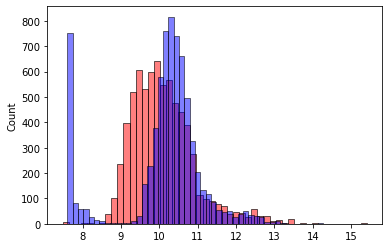

In [58]:
sns.histplot(y_pred, color = 'Red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)

#### Evaluating the quality of predictions using root mean square error method. From this we will know how far is the predicted value to actual value 

In [59]:
def rmse (y,y_pred):
    se = (y-y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [60]:
rmse(y_train, y_pred)

0.7554192603920132

#### Following same method for validation data set

In [61]:
X_val = df_val[base].fillna(0).values
w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.7510033473915448

#### Preparing a function for the above equation

In [62]:
def prepare_x(df):
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [63]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

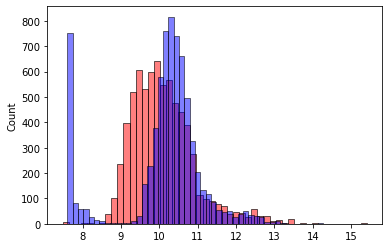

In [64]:
sns.histplot(y_pred, color = 'Red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)


In [65]:
X_val = prepare_x(df_val)
w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_train.dot(w)

y_pred

array([ 9.68070406,  9.46519237,  9.83128599, ..., 10.21120559,
       12.11862828, 10.05403146])

<AxesSubplot:ylabel='Count'>

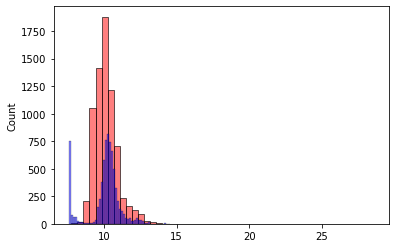

In [66]:
sns.histplot(y_pred, color = 'Red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)

#### Adding more feature to base to increase the accuracy of prediction 

In [67]:
def prepare_x(df):
    
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

0.5175055465840046

<AxesSubplot:ylabel='Count'>

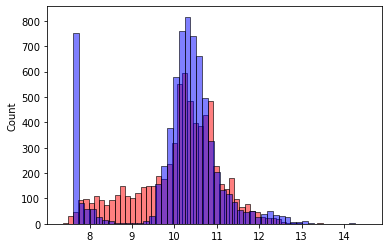

In [69]:
sns.histplot(y_pred, color = 'Red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)

In [70]:
X_val = prepare_x(df_val)


w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5153170774003943

<AxesSubplot:ylabel='Count'>

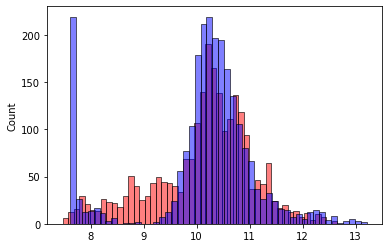

In [71]:
sns.histplot(y_pred, color = 'Red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins=50)

#### Categorical variable

#### for one col

In [72]:
for v in [2.0, 3.0, 4.0]:
    df_train['num_of_doors%s' % v] = (df_train.number_of_doors == v).astype('int')

In [73]:
def prepare_x(df):
        
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_of_doors%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors%s' % v)
    
        
      
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#### To add multiple col that has categorical variable



In [74]:
categorical_variable = ['make','engine_fuel_type', 'transmission_type', 'driven_wheels', 
                        'market_category', 'vehicle_size', 'vehicle_style']

categories = {}

for c in categorical_variable:
    categories[c] = list(df[c].value_counts().head().index)
    
    


In [75]:
def prepare_x(df):
        
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_of_doors%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors%s' % v)
    
    for c, values in categories.items():
        for v in values:
                 df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
                 features.append('%s_%s' % (c,v))
            
           
      
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [76]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
w0, w = train_linear_regression(X_val,y_val)

rmse(y_val, y_pred)

30.49614122542036

#### Regularization

In [77]:
def train_linear_regression_reg(X, y, r):
    X = np.array(X)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [78]:
X_train = prepare_x(df_train)
y_pred = w0 + X_train.dot(w)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
rmse(y_train,y_pred)

1447398972065200.5

In [79]:
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
w0, w = train_linear_regression_reg(X_val,y_val, r=0.01)

rmse(y_val, y_pred)

0.45652199012699296

#### Tuning the model

In [80]:
r = 0.001

X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
w0, w = train_linear_regression_reg(X_val,y_val, r=r)

rmse(y_val, y_pred)

0.4565175086968008

#### Using the model

In [81]:
df_full_train = pd.concat([df_train, df_val])

In [82]:
df_full_train = df_full_train.reset_index(drop = True)

In [83]:
X_full_train = prepare_x(df_full_train)

In [84]:
y_full_train = np.concatenate([y_train, y_val])

In [85]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [86]:
X_test = prepare_x(df_test)
y_pred = w0 + X_val.dot(w)
score = rmse(y_test, y_pred)

score

1.4886110708288354

In [87]:
car = df_test.iloc[20].to_dict()

In [88]:
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [89]:
df_small = pd.DataFrame([car])

In [90]:
X_small = prepare_x(df_small)

In [91]:
y_pred = w0 + X_small.dot(w)
y_pred[0]

10.46265172180439

In [92]:
np.expm1(y_pred)[0]

34983.19691540197

In [93]:
y_test[20]

10.463131911491967

In [94]:
np.expm1(y_test[20])

35000.00000000001